# 2030ICT/7030ICT

## Introduction to Big Data Analytics

Assignment Specifications Part 1

Group Submission - Louise Howard, Caleb Davis, Mark English

## Part 1 Section 1 - Describe the Dataset

In [1]:

# import all libraries requird in the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

# read in the data from the supplied assignment file and check input via table 
df = pd.read_csv("data_assignment.csv")


In [2]:
# Describe the dataset (e.g.: type of column, value range)
# How many rows (first # outputted) and columns are in the dataset
print(f'Describe the dataset:')
print(f'Shape {df.shape},')
print(f'Column Headers {df.columns}')


Describe the dataset:
Shape (149999, 13),
Column Headers Index(['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'],
      dtype='object')


In [3]:
# How many records are there in the dataset?
print(f'There are {df.shape[0]}, records in the dataset.')

There are 149999, records in the dataset.


In [4]:
# What period does it cover?
# Assign the lowest date to firstDate and the highest date to lastDate then print out the period covered
firstDate = df["Date"].min()
lastDate = df["Date"].max()

print(f'The period covered is from the {firstDate}, to the {lastDate}.')

# How many dates have job postings?
# Assign the number of dates in the range to jb and then look at the length of the list, then print out
jb = df["Date"].value_counts()
posted = len(jb)

print(f'There are {posted} dates that have job postings.')

The period covered is from the 2018-10-01T00:00:00.000Z, to the 2018-11-13T00:00:00.000Z.
There are 44 dates that have job postings.


In [5]:
# How many locations does the dataset have?
locations = df['Location'].value_counts()
locationscount = len(locations)
print(locationscount)
# Which location has the most job postings?
print(f'{locations.keys()[0]} has the most jobs with {locations[0]} postings')


65
Sydney has the most jobs with 46357 postings


In [6]:
# How many job sectors (job classifications) are there in the dataset?
classes = df['Classification'].value_counts()
class_counts = len(classes)
print(f'There are {class_counts} job sectors (names and amounts listed below)')
# List the name of each sector and it's total of job postings? 
sector_counts = df['Classification'].value_counts()
sector_counts

There are 30 job sectors (names and amounts listed below)


Information & Communication Technology    16661
Trades & Services                         14125
Healthcare & Medical                      12515
Hospitality & Tourism                     11818
Manufacturing, Transport & Logistics       9608
Administration & Office Support            7636
Accounting                                 7075
Education & Training                       7033
Retail & Consumer Products                 6496
Sales                                      6281
Construction                               6254
Government & Defence                       5926
Engineering                                4812
Mining, Resources & Energy                 4679
Community Services & Development           3528
Banking & Financial Services               3481
Human Resources & Recruitment              3233
Call Centre & Customer Service             3127
Legal                                      3071
Marketing & Communications                 3052
Real Estate & Property                  

In [7]:
#Choose your favorite job sector (e.g. Information & Communication Technology), how many sub-sectors are there in that sector? List the name of each sub-sector and its’ job posting number

# Copy the subclasses of selected Class to another array
selectedClass = 'Information & Communication Technology'
subclasses = []
for i in range(len(df['Classification'])):
    if df['Classification'][i] == selectedClass:
        subclasses.append(df['SubClassification'][i])
# Use a dict to count dupes
subs2 = {}
for i in range(len(subclasses)):
    if subclasses[i] not in subs2:
        subs2[subclasses[i]] = 1
    else:
        count = subs2[subclasses[i]]
        subs2[subclasses[i]] = count + 1
print(f'There are {len(subs2)} sub-sectors (names and amounts listed below)')
subs2

There are 22 sub-sectors (names and amounts listed below)


{'Help Desk & IT Support': 1074,
 'Sales - Pre & Post': 349,
 'Networks & Systems Administration': 927,
 'Programme & Project Management': 1665,
 'Security': 524,
 'Consultants': 849,
 'Architects': 1110,
 'Other': 742,
 'Business/Systems Analysts': 2076,
 'Developers/Programmers': 3069,
 'Web Development & Production': 351,
 'Engineering - Software': 1087,
 'Product Management & Development': 281,
 'Engineering - Network': 402,
 'Team Leaders': 141,
 'Testing & Quality Assurance': 606,
 'Management': 561,
 'Database Development & Administration': 395,
 'Telecommunications': 269,
 'Technical Writing': 77,
 'Engineering - Hardware': 94,
 'Computer Operators': 12}

In [8]:
high = df['HighestSalary']
low = df['LowestSalary']
ranges = {}
for i in range(len(high)):
    if (low[i], high[i]) not in ranges:
        ranges[(low[i], high[i])] = 1
    else:
        rangecount = ranges[(low[i], high[i])]
        ranges[(low[i], high[i])] = rangecount + 1
ranges

{(0, 30): 27606,
 (30, 40): 12441,
 (40, 50): 17708,
 (50, 60): 12559,
 (60, 70): 14108,
 (70, 80): 12932,
 (80, 100): 12582,
 (100, 120): 13062,
 (120, 150): 10651,
 (150, 200): 11738,
 (200, 250): 4612}

In [9]:
#List the job types. In each job type, what are the lowest salary and highest salary?
#using high and low form last
jobtypes = df['JobType'].value_counts()
listjobtypes = jobtypes.keys()
print(listjobtypes)
highest = [''] * len(listjobtypes)
lowest = [''] * len(listjobtypes)
for i in range(len(df['JobType'])):
    for j in range(len(listjobtypes)):
        if df['JobType'][i] == listjobtypes[j]:
            if highest[j] == '':
                highest[j] = high[i]
            if highest[j] < high[i]:
                highest[j] = high[i]
            if lowest[j] == '':
                lowest[j] = low[i]
            if lowest[j] > low[i]:
                lowest[j] = low[i]
print(f'the job types are')
for k in range(len(listjobtypes)): 
    print(f'{listjobtypes[k]} with salaries ranging from {lowest[k]} to {highest[k]}')

Index(['Full Time', 'Contract/Temp', 'Casual/Vacation', 'Part Time'], dtype='object')
the job types are
Full Time with salaries ranging from 0 to 250
Contract/Temp with salaries ranging from 0 to 250
Casual/Vacation with salaries ranging from 0 to 250
Part Time with salaries ranging from 0 to 250


## Part 1 Section 2 - Normalize and clean data


In [10]:
# The salaries are kept in the dataset as “HighestSalary” and “LowestSalary”. 
# You should calculate the “AverageSalary” for each job.

# Calculate the average salary for each job and place in new column by - (lowest salary + highest salary) / 2
df["AverageSalary"] = (df["LowestSalary"] + df["HighestSalary"]) / 2
df["AverageSalary"] = pd.to_numeric(df["AverageSalary"], downcast= 'signed')



In [24]:
ClassCount = df['Classification'].value_counts().index
ClassCount[0]

'Information & Communication Technology'

In [40]:
ClassCount

Index(['Information & Communication Technology', 'Trades & Services',
       'Healthcare & Medical', 'Hospitality & Tourism',
       'Manufacturing, Transport & Logistics',
       'Administration & Office Support', 'Accounting', 'Education & Training',
       'Retail & Consumer Products', 'Sales', 'Construction',
       'Government & Defence', 'Engineering', 'Mining, Resources & Energy',
       'Community Services & Development', 'Banking & Financial Services',
       'Human Resources & Recruitment', 'Call Centre & Customer Service',
       'Legal', 'Marketing & Communications', 'Real Estate & Property',
       'Design & Architecture', 'Insurance & Superannuation',
       'Consulting & Strategy', 'Sport & Recreation', 'Science & Technology',
       'Farming, Animals & Conservation', 'Advertising, Arts & Media',
       'CEO & General Management', 'Self Employment'],
      dtype='object')

In [44]:
ClassCount = df['Classification'].value_counts().index
ClassAverageSalary = []
ClassSalary = df[['Classification', 'AverageSalary']]
for j in range(len(ClassCount)):
    temp = 0
    tempcounter = 0
    for i in range(149999):
        if ClassSalary['Classification'][i] == ClassCount[j]:
            temp = temp + ClassSalary['AverageSalary'][j]
            tempcounter = tempcounter + 1

    ClassAverageSalary.append(ClassSalary['Classification'][j])
    ClassAverageSalary.append(temp/tempcounter)

In [45]:
ClassAverageSalary

['Retail & Consumer Products',
 15.0,
 'Retail & Consumer Products',
 15.0,
 'Retail & Consumer Products',
 15.0,
 'Retail & Consumer Products',
 15.0,
 'Call Centre & Customer Service',
 15.0,
 'Call Centre & Customer Service',
 15.0,
 'Hospitality & Tourism',
 15.0,
 'Hospitality & Tourism',
 15.0,
 'Call Centre & Customer Service',
 15.0,
 'Hospitality & Tourism',
 15.0,
 'Banking & Financial Services',
 15.0,
 'Call Centre & Customer Service',
 15.0,
 'Hospitality & Tourism',
 15.0,
 'Hospitality & Tourism',
 15.0,
 'Hospitality & Tourism',
 15.0,
 'Call Centre & Customer Service',
 15.0,
 'Retail & Consumer Products',
 15.0,
 'Retail & Consumer Products',
 15.0,
 'Retail & Consumer Products',
 15.0,
 'Manufacturing, Transport & Logistics',
 15.0,
 'Manufacturing, Transport & Logistics',
 15.0,
 'Hospitality & Tourism',
 15.0,
 'Banking & Financial Services',
 15.0,
 'Hospitality & Tourism',
 15.0,
 'Sales',
 15.0,
 'Hospitality & Tourism',
 15.0,
 'Administration & Office Support'

In [12]:
# The raw dataset values of the "Id" column had inconsistencies in their representation. 
# The Id values should have 8 number long integers only. Write code to remove unnecessary characters.
# What values are not 8 long ints that need to be fixed?

# There are no issues in the ID column 

In [13]:
# The "Date" column is represented in a format that contained both date and time information. 
# However, the time is not correct and should be removed 

df["Date"] = df["Date"].replace(to_replace = r'T.*', value = '', regex = True)

In [14]:
# Change type of “Id” column to numeric and change type of “Date” column to DateTime
# 'Id' is already INT changing it to numeric adds a .0 on the end which is not desired
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary                 int16
dtype: object

In [15]:
# Are there any duplicate data in the dataset? Provide the way you find them and your solution to fix it.
Ids = {}
Dupes = []
for i in range(len(df['Id'])):
    if df['Id'][i] not in Ids:
        Ids[df['Id'][i]] = 1
    else:
        Dupes.append(df['Id'][i])
if len(Dupes) > 0:
    if len(Dupes) == 1:
        print(f"there is 1 Duplicate Having an Id of {Dupes}")
    else:
        print(f"there is {len(Dupes)} Duplicates Having Id's of {Dupes}")
else:
    print("There are no duplicates")

There are no duplicates


In [16]:
# Check missing data and visualize them in a corresponding chart.** (1.5 point)
def blanks(x):
    counter = 0
    for i in range(len(x)):
        counter = counter + x[i]
    return df.shape[0] - counter


In [17]:
# Creating a list of the Missing Data for graph below

NV = []
NV.append(0)
#'Title'
TitleB = df['Title'].value_counts()
print(f'Title has {blanks(TitleB)} blanks')
NV.append(blanks(TitleB))
#'Company'
Companys = df['Company'].value_counts()
print(f'Companys has {blanks(Companys)} blanks')
NV.append(blanks(Companys))
#'Date'
DateB = df['Date'].value_counts()
print(f'Blank has {blanks(DateB)} blanks')
NV.append(blanks(DateB))
#'Blank'
LocationB = df['Location'].value_counts()
print(f'Blank has {blanks(LocationB)} blanks')
NV.append(blanks(LocationB))
#'Area'
Areas = df['Area'].value_counts()
print(f'Area has {blanks(Areas)} blanks')
NV.append(blanks(Areas))
#'Classification'
ClassificationB = df['Classification'].value_counts()
print(f'Classification has {blanks(ClassificationB)} blanks')
NV.append(blanks(ClassificationB))
#'SubClassification'
SubClassificationB = df['SubClassification'].value_counts()
print(f'SubClassification has {blanks(SubClassificationB)} blanks')
NV.append(blanks(SubClassificationB))
#'Requirement'
Req = df['Requirement'].value_counts()
print(f'Requirement has {Req[0]} blanks. they show up as {Req.keys()[0]}')
NV.append(Req[0])
#'FullDescription'
Desc = df['FullDescription'].value_counts()
print(f'FullDescription has {blanks(Desc)} blanks')
NV.append(blanks(Desc))
NV.append(0)
NV.append(0)
#'JobType'
print(f'JobType has {blanks(jobtypes)} blanks')
NV.append(blanks(jobtypes))

Title has 0 blanks
Companys has 5762 blanks
Blank has 0 blanks
Blank has 0 blanks
Area has 56503 blanks
Classification has 0 blanks
SubClassification has 0 blanks
Requirement has 168 blanks. they show up as #NAME?
FullDescription has 3282 blanks
JobType has 3233 blanks


In [18]:
# Add data to NVCount for graph which is the full quantity of data items in each column

NVCount = []

for i in range(len(NV)):
   NVCount.append(149999)

# test to see what has been appended to list for graph    
#NVCount   

In [19]:
#Testing data has appended to lists for graph
#print(NV)
#print(len(NV))
#print(len(NVCount))

NVHEAD = ['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType']
NVHEAD2 = ('Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType')
#print(len(NVHEAD))
nvdf = pd.DataFrame({'HEAD':NVHEAD,'VALUE':NV})
#print(nvdf)

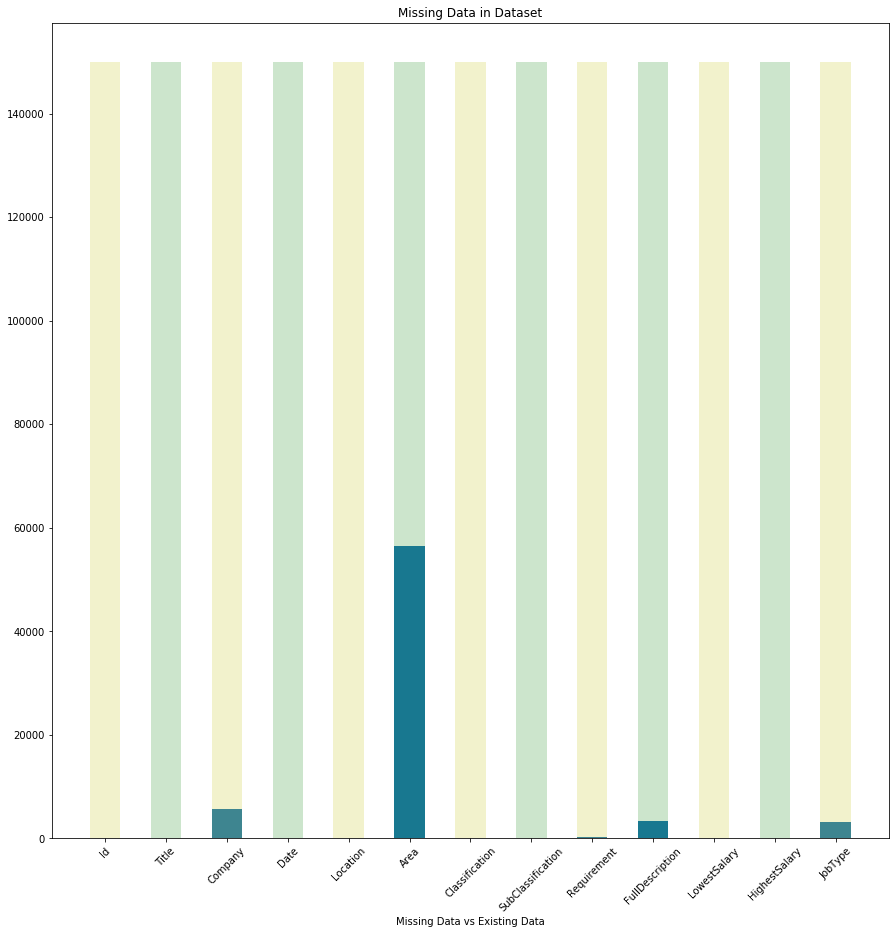

In [27]:
plt.figure(figsize=(15,15))
#sns.countplot(y='HEAD',data=nvdf,order=nvdf.HEAD.value_counts().index, orient='h')
#plt.bar(NVHEAD2, NV, align='center', alpha=0.5, width = .5)
p1 = plt.bar(NVHEAD2, NV, align='center', alpha=1, width = .5)
p2 = plt.bar(NVHEAD2, NVCount, align='center', alpha=0.2, width = .5, color = 'yg')
plt.title('Missing Data in Dataset')
plt.xlabel('Missing Data vs Existing Data')
plt.xticks(label=NVHEAD, rotation=45)
plt.show()

## Part 2 – Data Analysis and Interpretation

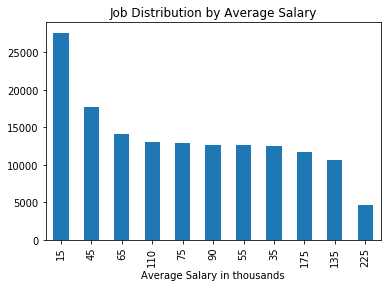

In [20]:
# Get the salary ranges using “AverageSalary”, the total jobs of each range and display them in the bar chart

df_avgSalary = df["AverageSalary"].value_counts()

df_avgSalary.plot(kind='bar')

plt.title('Job Distribution by Average Salary')
plt.xlabel('Average Salary in thousands')
plt.show()


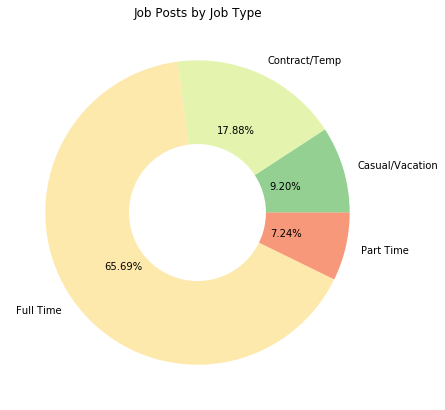

In [21]:
# Display the list of job types and the number of jobs of each type using pie chart
#using high and low from last
df_jobtypes = df['JobType'].value_counts()

#create dataframe for the job types
df_jobtypes = df[df['JobType'].isna()==False]
df_jobtypes = df_jobtypes.groupby('JobType').count()
df_jobtypes['Label'] = df_jobtypes.index
df_jobtypes['Count'] = df_jobtypes["Id"]

#job ranges plot
fig, ax = plt.subplots(figsize=(7,7)) 
ax.pie(df_jobtypes['Count'], colors=sns.color_palette("RdYlGn_r", len(df_jobtypes)),labels= df_jobtypes['Label'], wedgeprops={'alpha':0.7},autopct='%1.2f%%')
ax.set_title('Job Posts by Job Type', loc='center')

# add centre circle to make it a donut
centre_circle2 = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=0)
ax.add_patch(centre_circle2)
plt.show()

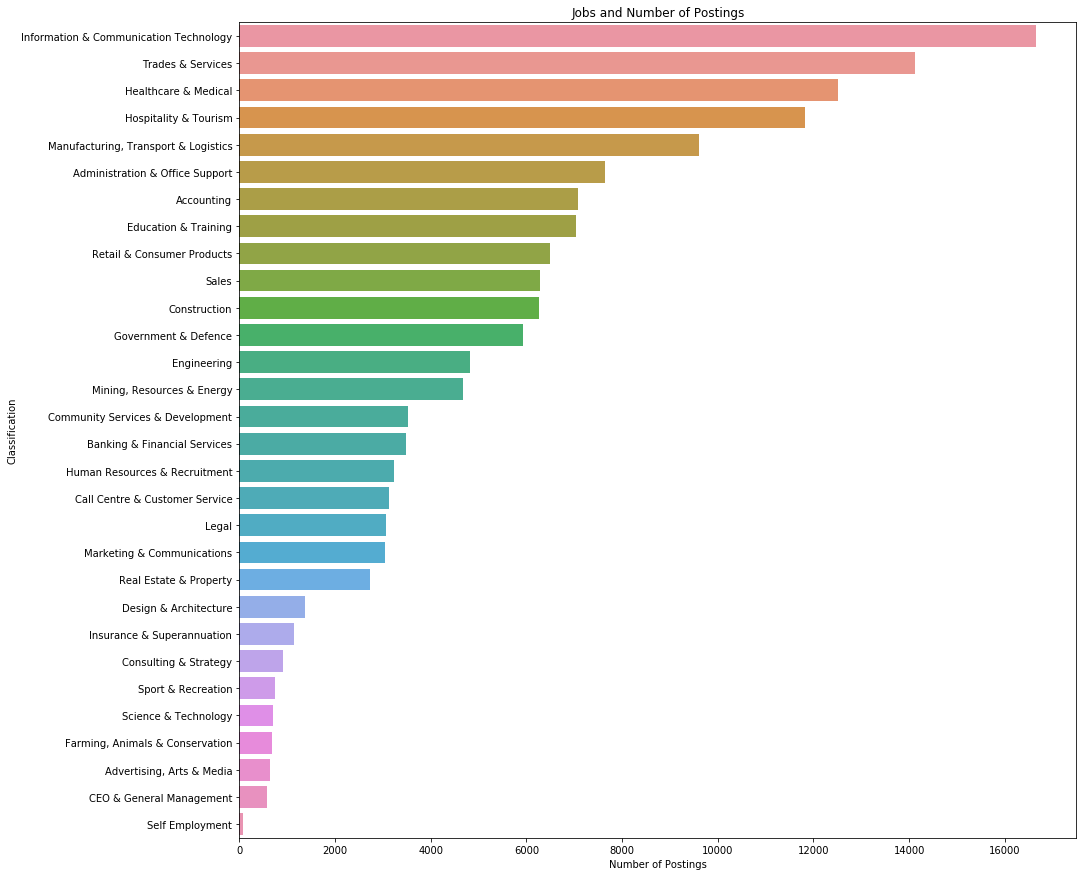

In [22]:
# Display the list of job sectors and the number of jobs of each type using horizontal bar chart

plt.figure(figsize=(15,15))
sns.countplot(y='Classification',data=df,order=df.Classification.value_counts().index)
plt.title('Jobs and Number of Postings')
plt.xlabel('Number of Postings')
plt.show()

In [23]:
# setup
selectedCity = 'Brisbane'
subclasses = []
for i in range(len(df['Location'])):
    if df['Location'][i] == selectedCity:
        subclasses.append(df['Classification'][i])

# Use a dict to count dupes
CityJobCount = {}
for i in range(len(subclasses)):
    if subclasses[i] not in CityJobCount:
        CityJobCount[subclasses[i]] = 1
    else:
        count = CityJobCount[subclasses[i]]
        CityJobCount[subclasses[i]] = count + 1
print(f'There are {len(CityJobCount)} sub-sectors (names and amounts listed below).')

There are 30 sub-sectors (names and amounts listed below).


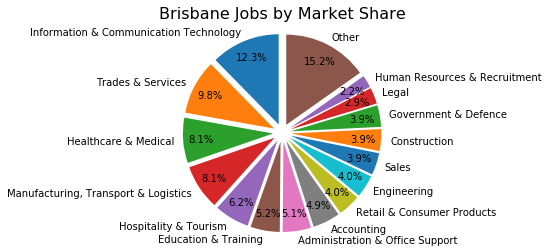

In [24]:
ListCityJobCount = sorted(CityJobCount.items(), key=lambda x: x[1],reverse=True)
Labels = []
Size = []
Explode =[]
CutOff = 15
OtherCount = 0
for i in range(len(ListCityJobCount)):
    if i < CutOff:
        Labels.append(ListCityJobCount[i][0])
        Size.append(ListCityJobCount[i][1])
        Explode.append(0.1)
    else:
        OtherCount = OtherCount + ListCityJobCount[i][1]
Labels.append('Other')
Size.append(OtherCount)
Explode.append(0.1)

# Pie chart for job market share of cities
plt.pie(Size, labels=Labels, colors=sns.color_palette(), autopct='%1.1f%%', startangle=90, pctdistance= 0.8, radius=1, explode = Explode)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title(f'{selectedCity} Jobs by Market Share',size=16,loc='center')
plt.show()

In [25]:
# Can you find the salary distribution for the top 30 cities for the number of job postings? 
# Visualize them in the boxplot chart

top30_locations = df['Location'].value_counts()
top30_locations = top30_locations[:30]
top30_keys = top30_locations.keys()

LocationSalary = df[['Location', 'AverageSalary']]

In [26]:
#Populate lists for the location and average salary data
T30L = []
T30S = []
for i in range(len(LocationSalary['Location'])):
    if LocationSalary['Location'][i] in top30_keys:
        T30L.append(LocationSalary['Location'][i])
        T30S.append(LocationSalary['AverageSalary'][i])
Top30Sal = pd.DataFrame({'Location':T30L,'Salary':T30S})

In [27]:
# Test print of the Top 30 Salary dataset created
#Top30Sal

In [28]:
#Create table of location names to use append to alldata list below
Top30Loc = Top30Sal['Location'].value_counts().index


In [29]:
#Put salary and location data for top 30 locations together in one list called alldata
alldata = []
for i in range(30):
    temp = []
    for j in range(len(Top30Sal['Salary'])):
        if Top30Sal['Location'][j] == Top30Loc[i]:
            temp.append(Top30Sal['Salary'][j])
    alldata.append(temp)

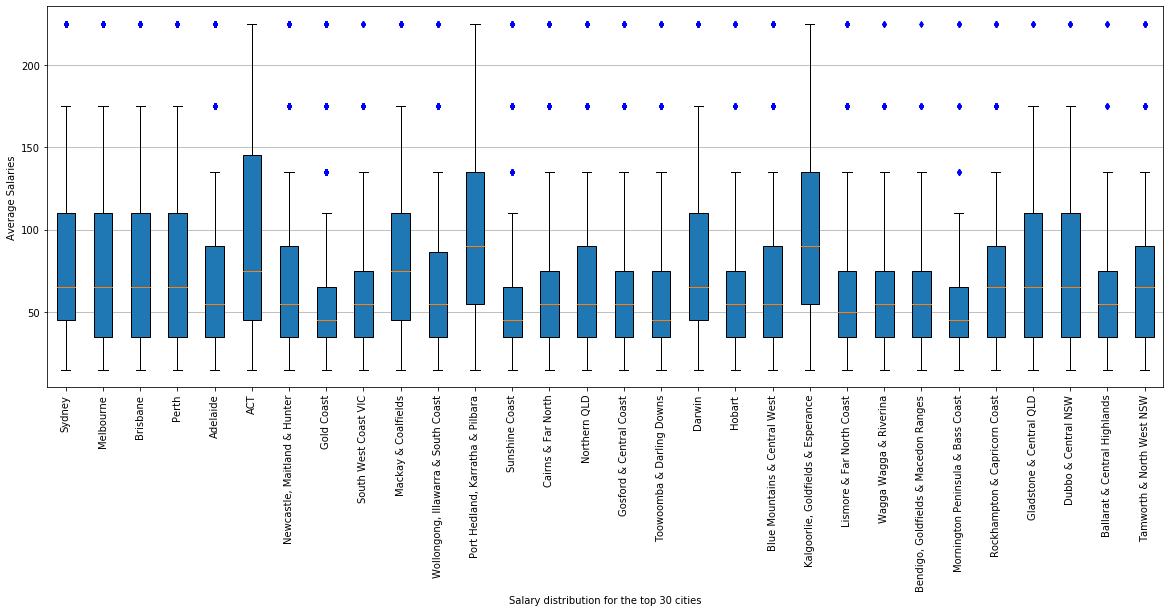

In [30]:
# Plot the alldata information into 
fig, axs = plt.subplots(figsize=(20, 7))


boxprops = dict(linewidth=3,color='darkgoldenrod')
#flierprops = dict(markerfacecolor='b', marker='s')
flierprops = dict(marker='d', markerfacecolor='b', markersize=4,
                  linestyle='none', markeredgecolor='b')
# plot box plot
axs.boxplot(alldata, flierprops=flierprops, patch_artist=True)

# plot box plot
#axs.boxplot(alldata)

axs.yaxis.grid(True)
axs.set_xlabel('Salary distribution for the top 30 cities')
axs.set_ylabel('Average Salaries')
# add x-tick labels
plt.setp(axs, xticks=[y + 1 for y in range(len(alldata))],
         xticklabels=Top30Sal['Location'].value_counts().index)
plt.setp(axs.get_xticklabels(), rotation =90)
plt.show()